## Muscle stem cell

### single-cell methylome data analysis

1. Process Coverage

In [14]:
import numpy as np
import pandas as pd
import os
import sys
sys.path.append('/lustre/user/liclab/liocean/maosl/methy_analysis/scAge/')
import scAge
import subprocess
import multiprocessing
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
num_total_cores = multiprocessing.cpu_count()

In [2]:
work_path = "/lustre/user/liclab/liocean/maosl/methy_analysis"

In [6]:
# designate input directory of .cov files
input_coverage_directory = work_path + "/dataset/muscle_cell_stem_cell/methy_data/"

# get .cov files
input_coverage_files = sorted(os.listdir(input_coverage_directory))

# remove ".ipynb_checkpoints" file if present
if ".ipynb_checkpoints" in input_coverage_files:
    input_coverage_files.remove(".ipynb_checkpoints")
    os.rmdir(input_coverage_directory + ".ipynb_checkpoints")
print("Coverage file input directory: '%s'" % input_coverage_directory)

# cycle through .cov files
for count, file in enumerate(input_coverage_files):
    print("\tRaw .cov file #%s --> '%s'" % (count + 1, file))

# denote output path for processed .tsv files
output_path = work_path + "/dataset/muscle_cell_stem_cell/methy_data_processed/"
print("\nProcessed file output directory: '%s'" % output_path)

Coverage file input directory: '/lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/methy_data/'
	Raw .cov file #1 --> 'GSM3436261_O1_TA_Hi_10.cov.gz'
	Raw .cov file #2 --> 'GSM3436262_O1_TA_Hi_11.cov.gz'
	Raw .cov file #3 --> 'GSM3436263_O1_TA_Hi_12.cov.gz'
	Raw .cov file #4 --> 'GSM3436264_O1_TA_Hi_13.cov.gz'
	Raw .cov file #5 --> 'GSM3436265_O1_TA_Hi_14.cov.gz'
	Raw .cov file #6 --> 'GSM3436266_O1_TA_Hi_15.cov.gz'
	Raw .cov file #7 --> 'GSM3436267_O1_TA_Hi_16.cov.gz'
	Raw .cov file #8 --> 'GSM3436268_O1_TA_Hi_17.cov.gz'
	Raw .cov file #9 --> 'GSM3436269_O1_TA_Hi_18.cov.gz'
	Raw .cov file #10 --> 'GSM3436270_O1_TA_Hi_19.cov.gz'
	Raw .cov file #11 --> 'GSM3436271_O1_TA_Hi_1.cov.gz'
	Raw .cov file #12 --> 'GSM3436272_O1_TA_Hi_20.cov.gz'
	Raw .cov file #13 --> 'GSM3436273_O1_TA_Hi_21.cov.gz'
	Raw .cov file #14 --> 'GSM3436274_O1_TA_Hi_22.cov.gz'
	Raw .cov file #15 --> 'GSM3436275_O1_TA_Hi_23.cov.gz'
	Raw .cov file #16 --> 'GSM3436276_O1_TA_Hi_24.cov.gz'
	Raw .

In [7]:
# run process_coverage
scAge.process_coverage(cov_directory = input_coverage_directory,
                       n_cores = num_total_cores,
                       max_met = 100,
                       split = "_",
                       chunksize = 1,
                       binarization = "round",
                       output_path = output_path)

# gzip output files
print("\nCompressing output .tsv files")
rm_previous_gzip = subprocess.run("rm %s*.gz" % output_path, shell = True)
gzip_out = subprocess.run("gzip -v %s*" % output_path, shell = True)
print("Binary methylation matrices compressed!")

process_coverage function starting!

----------------------------------------------------------
Loading .cov files from '/lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/methy_data/'
Number of Bismark .cov files = 275
First .cov file name: 'GSM3436261_O1_TA_Hi_10.cov.gz'
----------------------------------------------------------

----------------------------------------------------------
Starting parallel loading and processing of .cov files...


Single-cell loading progress :   0%|          | 0/275 [00:00<?, ? cell methylomes/s]


Parallel loading complete!
Processed binary methylation matrices written to '/lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/methy_data_processed/'
----------------------------------------------------------

Time elapsed to process coverage files = 60.209 seconds

process_coverage run complete!

Compressing output .tsv files


rm: cannot remove ‘/lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/methy_data_processed/*.gz’: No such file or directory
/lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/methy_data_processed/GSM3436261.tsv:	 79.8% -- replaced with /lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/methy_data_processed/GSM3436261.tsv.gz
/lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/methy_data_processed/GSM3436262.tsv:	 79.8% -- replaced with /lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/methy_data_processed/GSM3436262.tsv.gz
/lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/methy_data_processed/GSM3436263.tsv:	 79.9% -- replaced with /lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/methy_data_processed/GSM3436263.tsv.gz
/lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_

Binary methylation matrices compressed!


 80.2% -- replaced with /lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/methy_data_processed/GSM3436535.tsv.gz


2. construct reference

In [11]:
# designate full path to training matrix
training_DNAm_matrix_path = work_path + "/scAge/bulk/Thompson_Liver_BL6_bulk_matrix.h5.gz"
print("Training matrix path: '%s'" % training_DNAm_matrix_path)

# unzip trainig matrix
# 我们已经解压了
'''
print("Decompressing training matrix...")
gunzip_matrix = subprocess.run("gzip -d %s" % training_DNAm_matrix_path,
                               shell = True)
print("Training matrix decompressed!")
'''

# read in training matrix
print("Reading in training matrix...")
training_DNAm_matrix = pd.read_hdf(training_DNAm_matrix_path[:-3])

# check matrix dimensions and characteristics
print("\nTraining matrix characteristics:")
print("Number of samples = {:,}".format(len(training_DNAm_matrix)))
number_of_CpGs = len([x for x in training_DNAm_matrix.columns if "chr" in x])
print("Number of CpGs = {:,}".format(number_of_CpGs))
print("Sample distribution:")
pd.DataFrame(training_DNAm_matrix.loc[:, ["Strain", "Age", "Gender"]].value_counts().sort_index(),
             columns = ["Count"])

Training matrix path: '/lustre/user/liclab/liocean/maosl/methy_analysis/scAge/bulk/Thompson_Liver_BL6_bulk_matrix.h5.gz'
Reading in training matrix...

Training matrix characteristics:
Number of samples = 29
Number of CpGs = 748,955
Sample distribution:


Count
Strain   Age  Gender       
C57BL/6J 2.0  Female      4
              Male        5
         10.0 Female      5
              Male        5
         20.0 Female      5
              Male        5

In [13]:
# designate output path
output_path = work_path + "/scAge/train/Thompson_Liver_BL6.tsv"
print("Selected output path: '%s'\n" % output_path)

# run construct_reference
# note that progress bars only display correctly 
# when the notebook runs, and not on a static notebook
scAge.construct_reference(training_DNAm_matrix = training_DNAm_matrix,
                          output_path = output_path,
                          n_cores = num_total_cores,
                          chunksize = 200)

# gzip output .tsv file
print("Compressing reference file...")
gzip_ref = subprocess.run("gzip -vf %s" % output_path, shell = True)
print("Reference file compressed!")

Selected output path: '/lustre/user/liclab/liocean/maosl/methy_analysis/scAge/train/Thompson_Liver_BL6.tsv'

construct_reference function starting!

----------------------------------------------------------
Number of samples = 29
Number of CpGs = 748,955
----------------------------------------------------------


----------------------------------------------------------
Constructing list of arguments for parallel processing...


Reference progress (1/2) :   0%|          | 0/748955 [00:00<?, ? CpGs/s]

Argument list constructed!
----------------------------------------------------------


----------------------------------------------------------
Starting parallel processing with 32 cores...


Reference progress (2/2) :   0%|          | 0/748955 [00:00<?, ? CpGs/s]


Reference model dataset written to '/lustre/user/liclab/liocean/maosl/methy_analysis/scAge/train/Thompson_Liver_BL6.tsv'
Report file generated at '/lustre/user/liclab/liocean/maosl/methy_analysis/scAge/train/Thompson_Liver_BL6.report.txt'
----------------------------------------------------------



Time to run construct_reference: 57.042 seconds

construct_reference run complete!
Compressing reference file...


/lustre/user/liclab/liocean/maosl/methy_analysis/scAge/train/Thompson_Liver_BL6.tsv:	

Reference file compressed!


 57.4% -- replaced with /lustre/user/liclab/liocean/maosl/methy_analysis/scAge/train/Thompson_Liver_BL6.tsv.gz


3. predict scAge

In [15]:
# check single-cell data
sc_directory = work_path + "/dataset/muscle_cell_stem_cell/methy_data_processed/"
print("Single-cell input path: '%s'" % sc_directory)
sc_methylome_profiles = sorted(os.listdir(sc_directory))
if ".ipynb_checkpoints" in sc_methylome_profiles:
    os.rmdir(sc_directory + ".ipynb_checkpoints")
    sc_methylome_profiles.remove(".ipynb_checkpoints")
for count, profile in enumerate(sc_methylome_profiles):
    count = count + 1
    print("\tSingle-cell profile #%s: %s" % (count, profile))
      
# check bulk training data
train_directory = work_path + "/scAge/train/"
reference_file = "Thompson_Liver_BL6.tsv.gz"
full_reference_path = train_directory + reference_file
print("\nTraining reference data input path: %s" % full_reference_path)

# denote an output path
output_path = work_path + "/dataset/muscle_cell_stem_cell/scAge_result/"
print("\nOutput path: '%s'" % output_path)

Single-cell input path: '/lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/methy_data_processed/'
	Single-cell profile #1: GSM3436261.tsv.gz
	Single-cell profile #2: GSM3436262.tsv.gz
	Single-cell profile #3: GSM3436263.tsv.gz
	Single-cell profile #4: GSM3436264.tsv.gz
	Single-cell profile #5: GSM3436265.tsv.gz
	Single-cell profile #6: GSM3436266.tsv.gz
	Single-cell profile #7: GSM3436267.tsv.gz
	Single-cell profile #8: GSM3436268.tsv.gz
	Single-cell profile #9: GSM3436269.tsv.gz
	Single-cell profile #10: GSM3436270.tsv.gz
	Single-cell profile #11: GSM3436271.tsv.gz
	Single-cell profile #12: GSM3436272.tsv.gz
	Single-cell profile #13: GSM3436273.tsv.gz
	Single-cell profile #14: GSM3436274.tsv.gz
	Single-cell profile #15: GSM3436275.tsv.gz
	Single-cell profile #16: GSM3436276.tsv.gz
	Single-cell profile #17: GSM3436277.tsv.gz
	Single-cell profile #18: GSM3436278.tsv.gz
	Single-cell profile #19: GSM3436279.tsv.gz
	Single-cell profile #20: GSM3436280.tsv.gz
	S

In [16]:
scAge.run_scAge(single_cell_dir_or_dict = sc_directory,
                single_cell_set_name = "Muscle_stem_cells",
                reference_data = full_reference_path,
                selection_mode = "percentile",
                CpG_parameter = 1,
                zero_met_replacement = 0.001,
                one_met_replacement = 0.999,
                min_age = -20,
                max_age = 60,
                age_step = 0.1,
                n_cores = num_total_cores,
                uncertainty = 1,
                output_path = output_path,
                chunksize = 1)

scAge algorithm starting!

----------------------------------------------------------
Profiling epigenetic age in 'Muscle_stem_cells' single-cell data...
Loading processed binary methylation files from '/lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/methy_data_processed/'...
Number of single cells to analyze: 275
----------------------------------------------------------

scAge parameters:
----------------------------------------------------------
Using reference training data: Thompson_Liver_BL6
Shape of reference matrix: 743,078 CpGs, 4 metric columns


Using 32 cores with chunksize of 1


Setting minimum age to -20 month(s)
Setting maximum age to 60 month(s)
Using age step of 0.1 month(s)


Replacing modeled bulk methylation ≤ 0 with 0.001
Replacing modeled bulk methylation ≥ 1 with 0.999


Using profiling mode: percentile
--> Profiling top 1% age-related CpGs by absolute Pearson correlation 

Using a prediction uncertainty metric of +/- 1 for confide

scAge progress :   0%|          | 0/275 [00:00<?, ? age predictions/s]




Predictions stored in '/lustre/user/liclab/liocean/maosl/methy_analysis/dataset/muscle_cell_stem_cell/scAge_result/'
----------------------------------------------------------

Time elapsed to generate scAge results = 240.288 seconds

scAge run complete!


In [31]:
output_files = sorted(os.listdir(output_path))
counter = 1
print("Output files generated:")
for file in output_files:
    if ".tsv" in file:
        print(str(counter) + ") " + file)
        counter += 1

# load in predictions
test_predictions = pd.read_csv(output_path + \
                               "Muscle_stem_cells-train(Thompson_Liver_BL6)-mode(percentile)-param(top_1_pct).tsv",
                               sep = "\t",
                               index_col = 0)

Output files generated:
1) Muscle_stem_cells-train(Thompson_Liver_BL6)-mode(percentile)-param(top_1_pct).tsv


In [36]:
# load in metadata
meta_path = work_path + "/dataset/muscle_cell_stem_cell/meta_data/Muscle_stem_cells_meta_sc_methy.txt"
meta = pd.read_csv(meta_path, index_col = 0)
meta["Run"] = meta.index
meta.index = meta["Sample Name"]
meta.head(3)

,Age,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Cell_type,Center Name,Consent,...,LibrarySource,Mouse_ID,Organism,Platform,ReleaseDate,Sample Name,source_name,SRA Study,strain,Run
Sample Name,,,,,,,,,,,,,,,,,,,,,
GSM3436261,24 months,Bisulfite-Seq,250,891398250,PRJNA497312,SAMN10254811,351440127,Muscle stem cells,GEO,public,...,GENOMIC,O1,Mus musculus,ILLUMINA,2019-08-27T00:00:00Z,GSM3436261,Tibialis anterior muscles,SRP166031,MGI: 5308730,SRR8073317
GSM3436262,24 months,Bisulfite-Seq,250,775564750,PRJNA497312,SAMN10254810,307776943,Muscle stem cells,GEO,public,...,GENOMIC,O1,Mus musculus,ILLUMINA,2019-08-27T00:00:00Z,GSM3436262,Tibialis anterior muscles,SRP166031,MGI: 5308730,SRR8073318
GSM3436263,24 months,Bisulfite-Seq,250,844106750,PRJNA497312,SAMN10254809,335133628,Muscle stem cells,GEO,public,...,GENOMIC,O1,Mus musculus,ILLUMINA,2019-08-27T00:00:00Z,GSM3436263,Tibialis anterior muscles,SRP166031,MGI: 5308730,SRR8073319


In [38]:
# getting final dataframe
test_predictions = test_predictions.join(meta)
print("\nDimensions of predictions matrix = {} cells by {} attributes".format(*test_predictions.shape))
test_predictions.head(3)


Dimensions of predictions matrix = 275 cells by 42 attributes


,PredictedAge,MeanMet,CellCoverage,Intersections,AgesTested,AgeLikelihood,SelectedCpGs,NumberCpGs,Correlations,RegressionCoefs,...,LibrarySource,Mouse_ID,Organism,Platform,ReleaseDate,Sample Name,source_name,SRA Study,strain,Run
Cell,,,,,,,,,,,,,,,,,,,,,
GSM3436261,7.4,0.495683,1573383,75482,"[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19...","[-715.0498198684569, -713.3592511560981, -711....","['chr1_4492061', 'chr1_4492602', 'chr1_4492624...",755,"[0.6850124451745193, 0.6768475153891692, 0.712...","[0.0024265800626004, 0.0025922214326084, 0.002...",...,GENOMIC,O1,Mus musculus,ILLUMINA,2019-08-27T00:00:00Z,GSM3436261,Tibialis anterior muscles,SRP166031,MGI: 5308730,SRR8073317
GSM3436262,8.4,0.504778,1476676,68074,"[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19...","[-667.792102337063, -666.1468450593702, -664.6...","['chr1_39207057', 'chr1_74036953', 'chr1_74036...",681,"[0.6263290115368001, -0.7242767711776456, -0.7...","[0.0063168387865822, -0.0087348453801355, -0.0...",...,GENOMIC,O1,Mus musculus,ILLUMINA,2019-08-27T00:00:00Z,GSM3436262,Tibialis anterior muscles,SRP166031,MGI: 5308730,SRR8073318
GSM3436263,2.8,0.519260,1515471,71961,"[-20.0, -19.9, -19.8, -19.7, -19.6, -19.5, -19...","[-511.19948084927745, -510.201598165375, -509....","['chr1_34579659', 'chr1_36075003', 'chr1_36075...",720,"[0.6415226646287109, 0.6293905247966389, 0.677...","[0.0023065483147846, 0.0112255194932581, 0.010...",...,GENOMIC,O1,Mus musculus,ILLUMINA,2019-08-27T00:00:00Z,GSM3436263,Tibialis anterior muscles,SRP166031,MGI: 5308730,SRR8073319


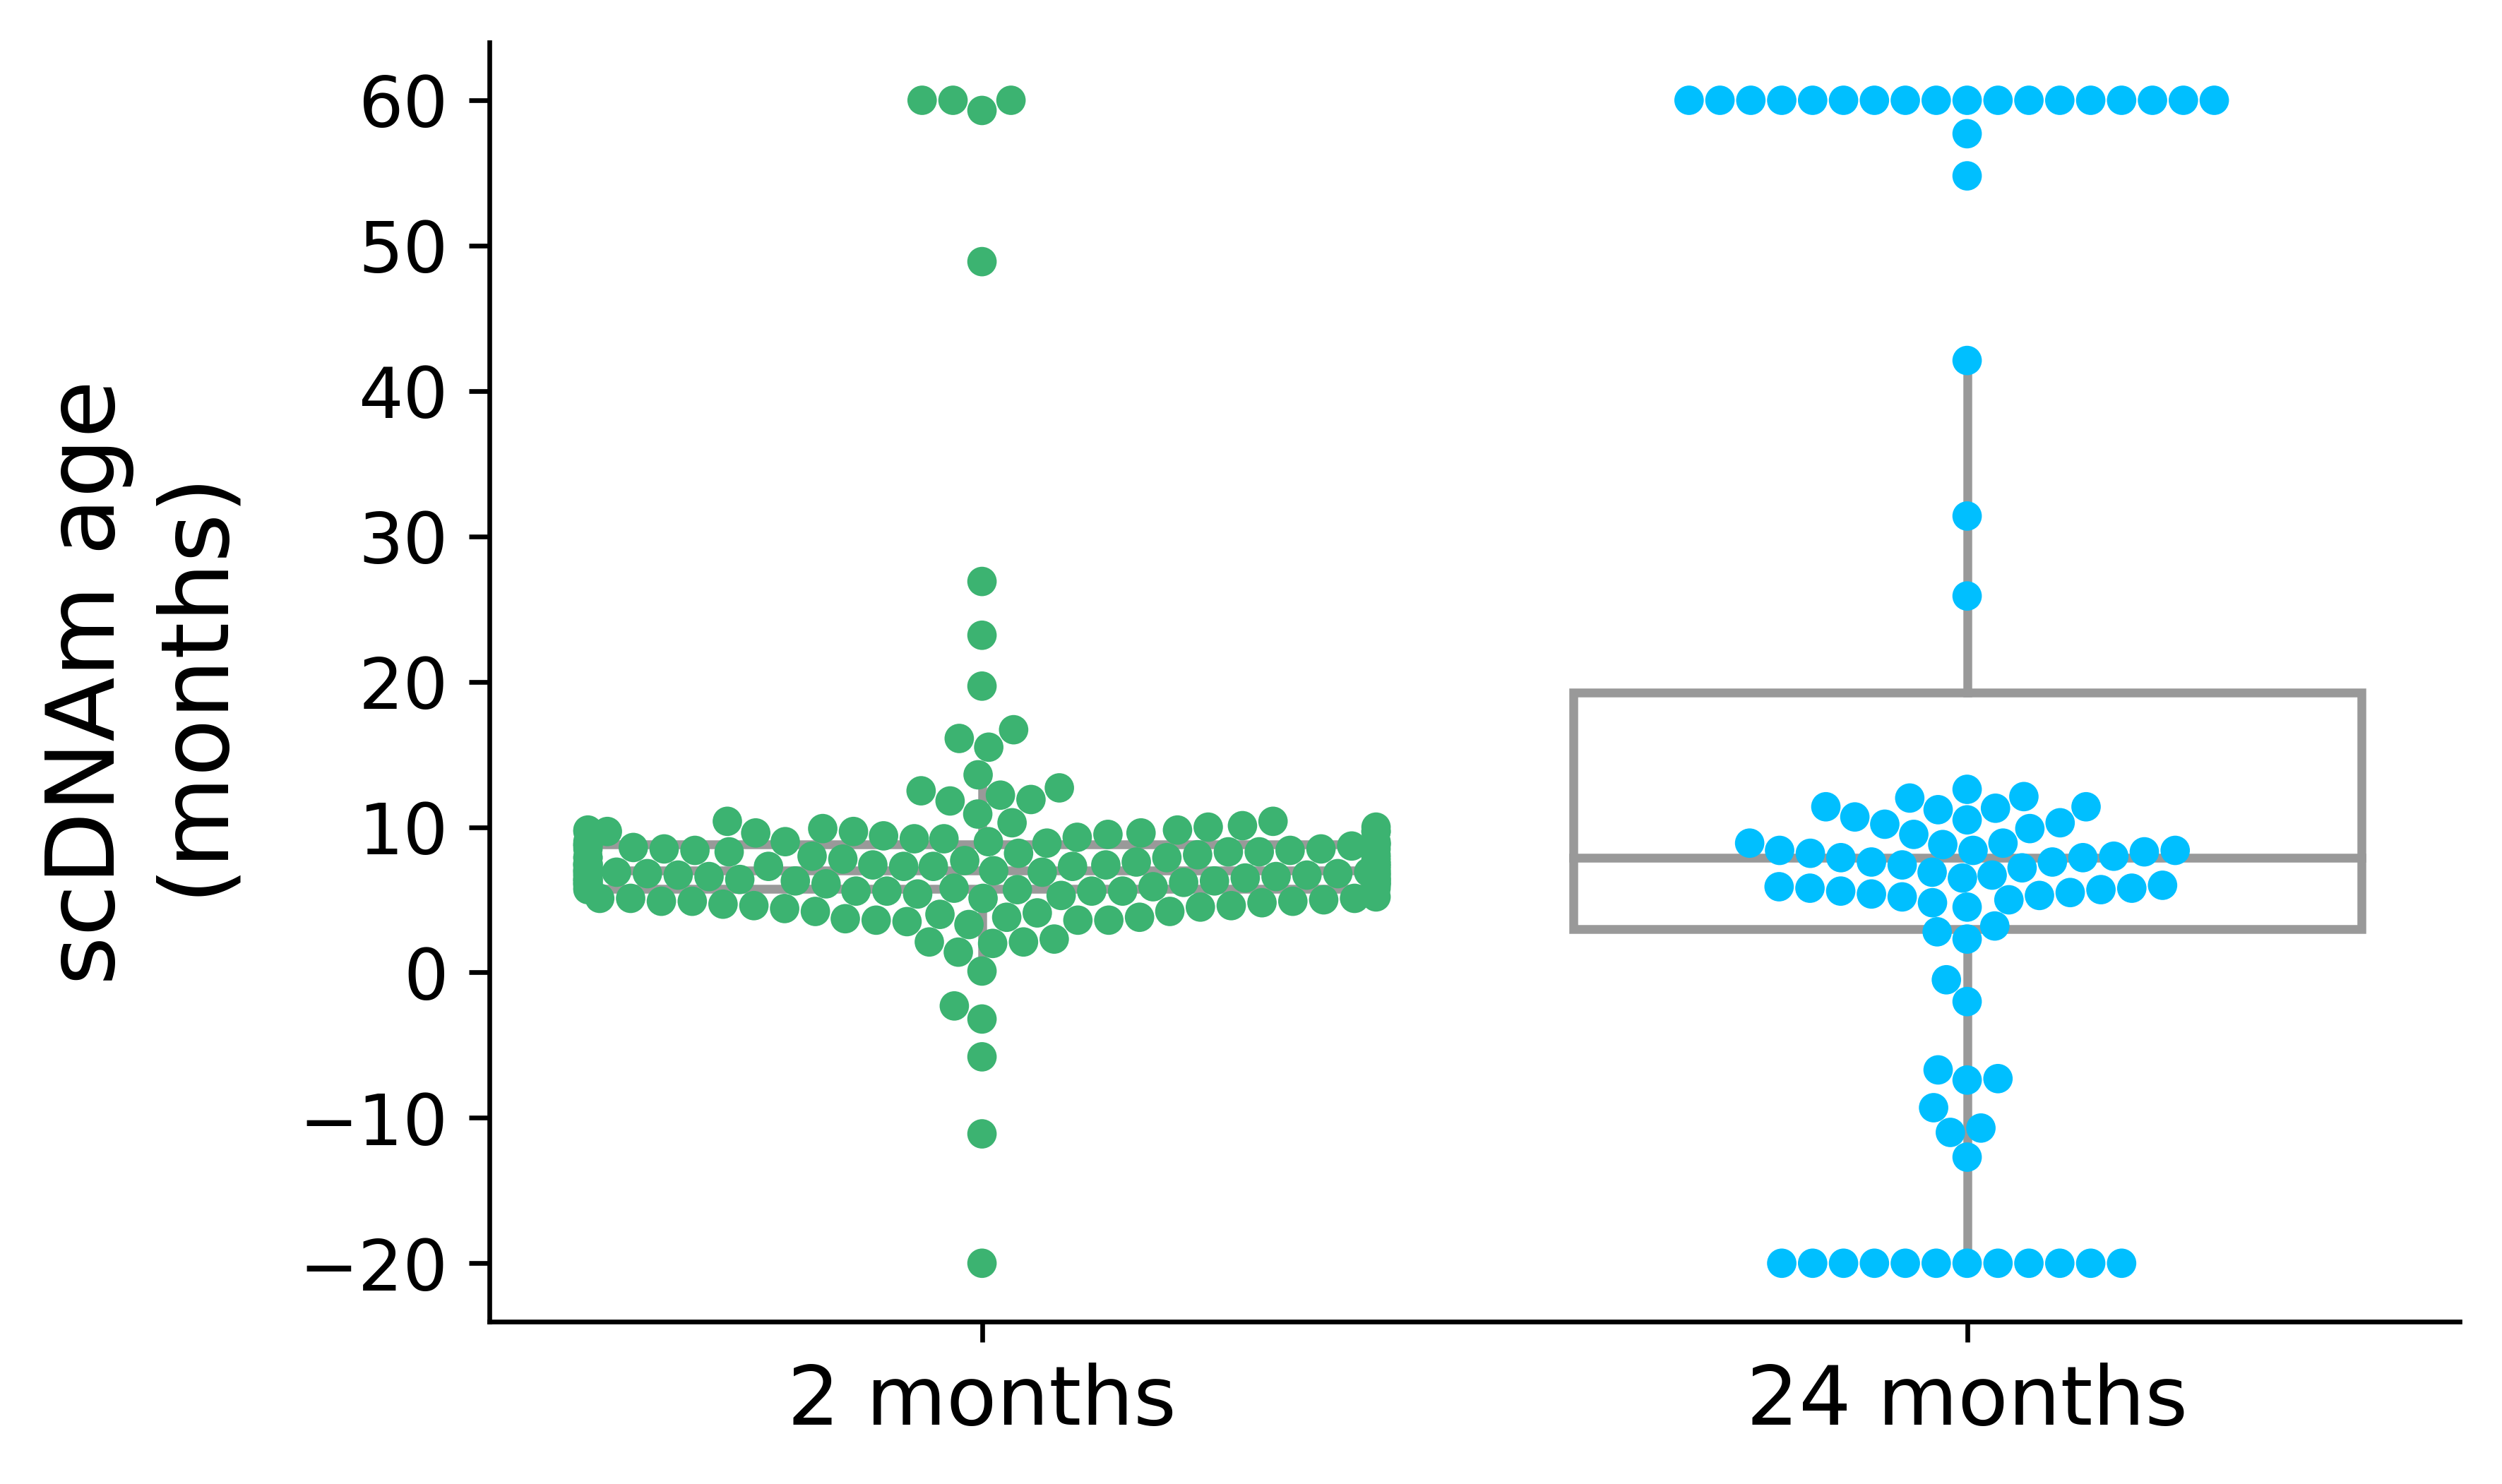

In [45]:
# plot predicted ages
fig, ax = plt.subplots(dpi = 600)

order = ["2 months", "24 months"]
palette = ["mediumseagreen", "deepskyblue"]
x = "Age"
y = "PredictedAge"

sns.boxplot(x = x,
            y = y,
            data = test_predictions,
            order = order,
            color = "white",
            showfliers = False,
            showcaps = False)
sns.swarmplot(x = x,
              y = y,
              data = test_predictions,
              order = order,
              palette = palette,
              s = 5)

#plt.plot([0.5, 1.5], [4, 4], linestyle = "--", linewidth = 3.1, color = "royalblue")
#plt.plot([1.5, 2.5], [26, 26], linestyle = "--", linewidth = 3.1, color = "red")
sns.despine()
plt.ylabel("scDNAm age\n(months)", fontsize = 16, labelpad = 10)
plt.xlabel("")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 12);

In [51]:
df_2months_age = test_predictions[test_predictions["Age"] == "2 months"]
df_24months_age = test_predictions[test_predictions["Age"] == "24 months"]

ss.ttest_ind(df_2months_age["PredictedAge"], df_24months_age["PredictedAge"], alternative="less")

Ttest_indResult(statistic=-2.9364087650811386, pvalue=0.0018016517716844718)